<a href="https://colab.research.google.com/github/MatteoBettini/Stock-Market-Prediction-2020/blob/main/notebooks/Data%20exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Take-home Assessment

## Imports

In [367]:
# To plot figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

# To make this notebook's output stable across runs
np.random.seed(42)

plt.rcParams['figure.figsize'] = (15.0, 10.0)
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.subplot.bottom'] = 0.125
plt.rcParams['figure.edgecolor'] = 'white'
plt.rcParams["savefig.dpi"] = 300

plt.rcParams['font.size'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

In [ ]:
"""
from google.colab import drive
drive.mount('/content/drive')

ax = nasdaq_df.plot(y=["Close"])

fig = ax.get_figure()
fig.savefig('/content/drive/My Drive/Stock_market_figures/close.png')
"""

# Dataset exploration

In this section we will upload and explore the dataset "**Processed_NASDAQ**",  containing several daily features of NASDAQ Composite from 2010 to 2017. The dataset was acquired from [this repository](https://archive.ics.uci.edu/ml/datasets/CNNpred%3A+CNN-based+stock+market+prediction+using+a+diverse+set+of+variables#).

It covers features from various categories of technical indicators, future contracts, price of commodities, important indices of markets around the world, price of major companies in the U.S. market, and treasury bill rates. Sources and thorough description of features have been mentioned in the paper "[CNNpred: CNN-based stock market prediction using a diverse set of variables](https://arxiv.org/pdf/1810.08923.pdf)".

## Loading the dataset

In [368]:
nasdaq_url = 'https://raw.githubusercontent.com/MatteoBettini/Stock-Market-Prediction-2020/main/stock_markets_datasets/Processed_NASDAQ.csv?token=ANHXQQK4VPBE6ABSBCHTF5K74UP3W'
dji_url = 'https://raw.githubusercontent.com/MatteoBettini/Stock-Market-Prediction-2020/main/stock_markets_datasets/Processed_DJI.csv?token=ANHXQQOXYQZSSSTVFKX6RZS74XDXA'
nyse_url = 'https://raw.githubusercontent.com/MatteoBettini/Stock-Market-Prediction-2020/main/stock_markets_datasets/Processed_NYSE.csv?token=ANHXQQNAISMPCLVLRTGNJBC74XD2C'
russel_url = 'https://raw.githubusercontent.com/MatteoBettini/Stock-Market-Prediction-2020/main/stock_markets_datasets/Processed_RUSSELL.csv?token=ANHXQQPGLBLSM3B36OLWIPC74XD3U'
s_p_url = 'https://raw.githubusercontent.com/MatteoBettini/Stock-Market-Prediction-2020/main/stock_markets_datasets/Processed_S%26P.csv?token=ANHXQQNRFS3NKP2XCF5Q5MS74XD5K'

In [369]:
nasdaq_df = pd.read_csv(nasdaq_url, parse_dates=["Date"], index_col="Date")
# Dataset is now stored in a Pandas Dataframe

We load the .csv file telling pandas to parse the date column and to use it to index the data.

## Exploring the dataset

Now that we have loaded the dataset we can start inspecting the data.

In [370]:
nasdaq_df.head(10)

,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,EMA_10,EMA_20,EMA_50,EMA_200,DTB4WK,DTB3,DTB6,DGS5,DGS10,Oil,Gold,DAAA,DBAA,GBP,JPY,CAD,CNY,AAPL,AMZN,GE,JNJ,JPM,MSFT,WFC,XOM,FCHI,FTSE,GDAXI,GSPC,HSI,...,NYSE,TE1,TE2,TE3,TE5,TE6,DE1,DE2,DE4,DE5,DE6,CTB3M,CTB6M,CTB1Y,Name,AUD,Brent,CAC-F,copper-F,WIT-oil,DAX-F,DJI-F,EUR,FTSE-F,gold-F,HSI-F,KOSPI-F,NASDAQ-F,GAS-F,Nikkei-F,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-12-31,2269.149902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.06,0.20,2.69,3.85,NaN,NaN,5.33,6.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.81,3.79,3.65,0.02,0.16,1.06,2.54,6.19,6.33,6.35,NaN,NaN,NaN,NASDAQ,0.35,-0.13,0.15,0.09,0.10,0.48,-1.19,-0.12,0.27,0.34,1.68,-0.07,-0.96,-2.40,0.67,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39
2010-01-04,2308.419922,0.560308,0.017306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.08,0.18,2.65,3.85,0.026830,0.000000,5.35,6.39,-0.004222,-0.004467,-0.010644,-0.001991,0.015565,-0.004609,0.021150,0.004192,0.028318,0.015420,0.012227,0.014078,0.019724,NaN,NaN,0.016043,NaN,...,0.019733,3.80,3.77,3.67,0.03,0.13,1.04,2.54,6.21,6.31,6.34,-0.100000,-0.043860,-0.014870,NASDAQ,1.73,2.81,1.99,1.36,2.71,0.96,1.28,0.61,1.74,2.05,-0.52,0.54,1.51,5.60,0.31,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10
2010-01-05,2308.709961,0.225994,0.000126,0.017306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.07,0.17,2.56,3.77,0.002699,0.001560,5.24,6.30,-0.007628,-0.009838,-0.001441,0.000015,0.001729,0.005900,0.005178,-0.011596,0.019370,0.000323,0.027452,0.003904,-0.000264,0.004036,-0.002718,0.003116,0.020909,...,0.003839,3.74,3.70,3.60,0.04,0.14,1.06,2.53,6.13,6.23,6.27,-0.055556,-0.073394,-0.033962,NASDAQ,-0.08,0.59,-0.11,0.24,0.32,-0.14,-0.04,-0.31,0.38,0.04,2.03,-0.18,-0.08,-4.20,0.47,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12
2010-01-06,2301.090088,-0.048364,-0.003300,0.000126,0.017306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.06,0.15,2.60,3.85,0.016883,0.006009,5.30,6.34,0.002067,0.008418,-0.007311,0.000191,-0.015906,-0.018116,-0.005151,0.008134,0.005494,-0.006137,0.001425,0.008643,0.001186,0.001358,0.000410,0.000546,0.006153,...,0.003104,3.82,3.79,3.70,0.03,0.12,1.04,2.49,6.19,6.28,6.31,-0.117647,0.000000,0.015625,NASDAQ,0.91,1.61,0.15,2.41,1.72,-0.01,0.01,0.31,0.16,1.59,0.79,0.78,-0.36,6.60,0.19,0.56,2.15,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77
2010-01-07,2300.050049,0.007416,-0.000452,-0.003300,0.000126,0.017306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.05,0.16,2.62,3.85,-0.006256,0.000221,5.31,6.33,-0.005609,0.011196,0.002035,-0.000073,-0.001849,-0.017013,0.051780,-0.007137,0.019809,-0.010400,0.036286,-0.003142,0.001775,-0.000597,-0.002481,0.004001,-0.006567,...,0.002200,3.83,3.80,3.69,0.03,0.14,1.02,2.48,6.17,6.28,6.31,0.066667,0.019802,0.007692,NASDAQ,-0.41,-0.46,0.15,-1.90,-0.63,-0.12,0.28,-0.66,0.06,-0.25,-0.60,-1.27,-0.05,-3.38,-0.09,-0.72,0.94,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58
2010-01-08,2317.169922,-0.054915,0.007443,-0.000452,-0.003300,0.000126,2.116212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.05,0.15,2.57,3.83,0.001695,-0.003097,5.32,6.32,0.005656,-0.007817,-0.004062,-0.000044,0.006648,0.027077,0.021538,0.003438,-0.002456,0.006897,-0.009269,-0.004012,0.005054,0.001357,0.003032,0.002882,0.001226,...,0.004249,3.81,3.78,3.68,0.03,0.13,1.00,2.49,6.17,6.27,6.30,-0.062500,-0.067961,-0.019084,NASDAQ,0.88,-0.17,0.53,-0.70,0.11,0.27,0.20,0.66,0.02,0.45,0.06,0.43,0.67,-0.98,1.03,0.61,0.68,0.64,0.35,-0.98,-0.58,-0.56,2.07,1.26,0.38
2010-01-11,2312.409912,-0.031463,-0.002054,0.007443,-0.000452,-0.003300,0.172845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.04,0.13,2.58,3.85,-0.002417,0.023297,5.35,6.32,0.005543,-0.006130,0.003884,-0.000147,-0.008822,-0.024041,0.009639,0.000156,-0.003357,-0.012720,-0.002079,0.011220,-0.000507,0.000705,0.000479,0.001747,0.005147,...,0.003192,3.84,3.81,3.72,0.03,0.

Taking a peak at the first ten elements we can already see that there are a lot of missing values. They will be treated accordingly in the section regarding data transofrmations.


We can also see that the dates inculuded in the dataset are referring only to working days as the stock market is open only on those days.

We can get a confirmation of this by looking at the following rows where we see that 16,17 January 2010 are not present because it was a weekend and 18 January 2010 is not present because of the federal U.S. festivity of "Martin Luther King Jr. Day".

This is not a problem for our machine leraning pipeline as we will map the 'Date' feature into a categorical feature representing the day of the week.
More information on this will be provided in the section about data transformation.

In [371]:
nasdaq_df.iloc[9:13]

,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,EMA_10,EMA_20,EMA_50,EMA_200,DTB4WK,DTB3,DTB6,DGS5,DGS10,Oil,Gold,DAAA,DBAA,GBP,JPY,CAD,CNY,AAPL,AMZN,GE,JNJ,JPM,MSFT,WFC,XOM,FCHI,FTSE,GDAXI,GSPC,HSI,...,NYSE,TE1,TE2,TE3,TE5,TE6,DE1,DE2,DE4,DE5,DE6,CTB3M,CTB6M,CTB1Y,Name,AUD,Brent,CAC-F,copper-F,WIT-oil,DAX-F,DJI-F,EUR,FTSE-F,gold-F,HSI-F,KOSPI-F,NASDAQ-F,GAS-F,Nikkei-F,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-14,2316.739990,-0.027683,0.003830,0.011212,-0.013017,-0.002054,0.725634,NaN,NaN,NaN,2302.394971,NaN,NaN,NaN,0.02,0.05,0.14,2.51,3.76,-0.003892,0.009758,5.17,6.22,0.002941,-0.001816,-0.007179,0.000029,-0.005792,-0.013632,-0.007724,0.002001,0.009943,0.020099,0.014346,0.000144,0.003727,0.004513,0.004316,0.002426,-0.001455,...,0.002474,3.74,3.71,3.62,0.03,0.12,1.05,2.46,6.08,6.17,6.20,-0.066667,-0.030928,-0.015686,NASDAQ,0.82,-0.63,0.36,-0.35,-0.33,0.33,0.33,-0.06,0.36,0.55,-0.60,1.14,0.31,-2.53,1.59,0.27,0.57,0.76,0.33,0.12,-0.13,-0.16,-1.49,0.32,0.39
2010-01-15,2287.989990,0.170174,-0.012410,0.003830,0.011212,-0.013017,-1.259292,0.830271,NaN,NaN,2299.775883,NaN,NaN,NaN,0.03,0.06,0.15,2.44,3.70,-0.017517,-0.009005,5.12,6.18,-0.003921,-0.005665,0.005472,0.000000,-0.016712,-0.001649,-0.015569,-0.008295,-0.022600,-0.003230,-0.031390,-0.008180,-0.015287,-0.007784,-0.018853,-0.010823,-0.002891,...,-0.012315,3.67,3.64,3.55,0.03,0.12,1.06,2.48,6.03,6.12,6.15,0.071429,-0.053191,-0.027888,NASDAQ,-0.94,-0.91,-0.53,-0.62,-1.75,-1.89,-0.94,-0.81,-0.83,-1.09,-0.43,0.38,-1.38,1.84,0.73,-0.55,-1.24,-1.42,-1.14,0.64,0.77,0.77,-3.27,-1.45,-1.08
2010-01-19,2320.399902,-0.224614,0.014165,-0.012410,0.003830,0.011212,0.345527,0.518969,NaN,NaN,2303.525705,NaN,NaN,NaN,0.03,0.06,0.14,2.48,3.73,0.013084,0.004433,5.22,6.21,0.005333,0.004948,0.002624,-0.000029,0.044238,0.003697,0.006083,0.012237,-0.009158,0.007777,0.007123,0.002315,0.013982,0.010577,0.017105,0.012500,0.001100,...,0.011811,3.70,3.67,3.59,0.03,0.11,0.99,2.48,6.07,6.15,6.18,-0.066667,0.044944,0.016393,NASDAQ,-0.17,0.69,0.79,0.50,1.31,0.91,0.59,-0.59,0.35,0.85,0.52,0.16,1.48,-2.35,-0.74,-0.95,0.49,1.54,1.19,0.89,0.58,0.57,-2.08,0.70,0.45
2010-01-20,2291.250000,0.149905,-0.012562,0.014165,-0.012410,0.003830,0.391706,-0.756265,NaN,NaN,2301.293759,NaN,NaN,NaN,0.03,0.05,0.14,2.45,3.68,-0.019752,-0.011253,5.24,6.16,-0.003586,-0.000077,0.013085,0.000073,-0.015392,-0.014341,-0.002418,-0.003060,0.002773,-0.016399,-0.016266,-0.017901,-0.020131,-0.016742,-0.020907,-0.010598,-0.018074,...,-0.015295,3.65,3.63,3.54,0.02,0.11,0.92,2.48,6.02,6.11,6.13,0.000000,-0.010753,-0.012097,NASDAQ,-1.73,-1.69,-2.06,-2.65,-1.77,-2.08,-1.06,-1.40,-1.72,-2.40,-2.02,0.00,-1.20,-1.10,-0.46,-1.64,-4.89,-1.30,-1.03,1.05,1.09,1.08,-2.08,-4.69,-2.32


### Features

The datasets described in [the paper](https://arxiv.org/pdf/1810.08923.pdf) contain 1984 entries, each representing a day of trading in a stock market. Each entry has 82 features which are grouped in the following way:

*   Primitive features
*   Technical indicators
*   Economic data
*   World stock markets
*   The exchange rate of U.S. dollar
*   Commodities
*   Big U.S. Companies
*   Futures contracts

The authors have made available five datasets, each representing a different stock market. The available markets are: S&P 500, NASDAQ Composite, Dow Jones Industrial Average, RUSSELL 2000, and NYSE Composite. In this work we will explore and analyse the NASDAQ Composite dataset, but all the insights we are going to gain will be valid for all datasets.

The primitive featrues and the technical indicators are unique for each dataset, while all the other features are common among datasets.

A tabular description of the features is also reported in the following images.

<img src="https://raw.githubusercontent.com/MatteoBettini/Stock-Market-Prediction-2020/main/feature_description/feature_table_1.png?token=ANHXQQI7BINXDEPRGLZ42LS74XAH6" width="2000">
<img src="https://raw.githubusercontent.com/MatteoBettini/Stock-Market-Prediction-2020/main/feature_description/feature_table_2.png?token=ANHXQQOG2ZP4BPHXIWXNWWK74XAKY" width="2000">

By looking at the info of the NASDAQ dataset we can see geatures, their types and the number of non-null values.

In [372]:
nasdaq_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1984 entries, 2009-12-31 to 2017-11-15
Data columns (total 83 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Close           1984 non-null   float64
 1   Volume          1983 non-null   float64
 2   mom             1983 non-null   float64
 3   mom1            1982 non-null   float64
 4   mom2            1981 non-null   float64
 5   mom3            1980 non-null   float64
 6   ROC_5           1979 non-null   float64
 7   ROC_10          1974 non-null   float64
 8   ROC_15          1969 non-null   float64
 9   ROC_20          1964 non-null   float64
 10  EMA_10          1975 non-null   float64
 11  EMA_20          1965 non-null   float64
 12  EMA_50          1935 non-null   float64
 13  EMA_200         1785 non-null   float64
 14  DTB4WK          1984 non-null   float64
 15  DTB3            1984 non-null   float64
 16  DTB6            1984 non-null   float64
 17  DGS5           

If we analyse carefully the features availaible in the actual dataset we may notice a few differences from those described in the paper.

Apart from the fact that the same feature may have different names in the two descriptions, in the loaded dataset we may find two **new** features:

| # | Feature | Description | Type |
| --- | --- | --- | --- |
| 83 | mom | Return of 1 day before | Technical indicator |
| 84| wheat-F | Relative change of wheat price| Comodity |

The features descriptions and types comes from my best intution, as I could not find any detailed description ot these two features.

In each market's dataset we may also see that there is a featrure indicating the name of the market from where the data comes.



In [373]:
nasdaq_df["Name"].value_counts()

NASDAQ    1984
Name: Name, dtype: int64

<a name="return_equation_cell"/>

Lastly, among the features IXIC, GSPC, DJI, NYSE and RUSSEL, the one referring to the market from where the dataset is from is dropped. This is because the return of such market at time $t$ can be computed from the "Close" feature as $$Return_{t} = \frac{Close_{t}}{Close_{t-1}} - 1$$

For example, in our dataset *Processed_NASDAQ* the feature IXIC is not present.

Therefore, we can understand why in our data frame we have 84 columns (Date which is the index) and 83 features. This is the result of the addition of "mom", "wheat-F" and "Name" to the 82 features described in the paper after having removed the redundant feature among IXIC, GSPC, DJI, NYSE and RUSSEL.

All features are floats except for Date (that has been parsed as datetime64) and Name that is a string.

We want also to reinsert the categorical feature describing the day of the week.
We do this in the following way:

In [374]:
nasdaq_df.insert(0,'day_of_week',nasdaq_df.index.day_name())

In [375]:
nasdaq_df.head(3)

,day_of_week,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,EMA_10,EMA_20,EMA_50,EMA_200,DTB4WK,DTB3,DTB6,DGS5,DGS10,Oil,Gold,DAAA,DBAA,GBP,JPY,CAD,CNY,AAPL,AMZN,GE,JNJ,JPM,MSFT,WFC,XOM,FCHI,FTSE,GDAXI,GSPC,...,NYSE,TE1,TE2,TE3,TE5,TE6,DE1,DE2,DE4,DE5,DE6,CTB3M,CTB6M,CTB1Y,Name,AUD,Brent,CAC-F,copper-F,WIT-oil,DAX-F,DJI-F,EUR,FTSE-F,gold-F,HSI-F,KOSPI-F,NASDAQ-F,GAS-F,Nikkei-F,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-12-31,Thursday,2269.149902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.06,0.20,2.69,3.85,NaN,NaN,5.33,6.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.81,3.79,3.65,0.02,0.16,1.06,2.54,6.19,6.33,6.35,NaN,NaN,NaN,NASDAQ,0.35,-0.13,0.15,0.09,0.10,0.48,-1.19,-0.12,0.27,0.34,1.68,-0.07,-0.96,-2.4,0.67,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39
2010-01-04,Monday,2308.419922,0.560308,0.017306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.08,0.18,2.65,3.85,0.026830,0.00000,5.35,6.39,-0.004222,-0.004467,-0.010644,-0.001991,0.015565,-0.004609,0.021150,0.004192,0.028318,0.015420,0.012227,0.014078,0.019724,NaN,NaN,0.016043,...,0.019733,3.80,3.77,3.67,0.03,0.13,1.04,2.54,6.21,6.31,6.34,-0.100000,-0.043860,-0.014870,NASDAQ,1.73,2.81,1.99,1.36,2.71,0.96,1.28,0.61,1.74,2.05,-0.52,0.54,1.51,5.6,0.31,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10
2010-01-05,Tuesday,2308.709961,0.225994,0.000126,0.017306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.07,0.17,2.56,3.77,0.002699,0.00156,5.24,6.30,-0.007628,-0.009838,-0.001441,0.000015,0.001729,0.005900,0.005178,-0.011596,0.019370,0.000323,0.027452,0.003904,-0.000264,0.004036,-0.002718,0.003116,...,0.003839,3.74,3.70,3.60,0.04,0.14,1.06,2.53,6.13,6.23,6.27,-0.055556,-0.073394,-0.033962,NASDAQ,-0.08,0.59,-0.11,0.24,0.32,-0.14,-0.04,-0.31,0.38,0.04,2.03,-0.18,-0.08,-4.2,0.47,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12


In [376]:
nasdaq_df["day_of_week"].value_counts()

Wednesday    408
Tuesday      407
Thursday     401
Friday       397
Monday       371
Name: day_of_week, dtype: int64

In [377]:
nasdaq_df.describe()

,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,EMA_10,EMA_20,EMA_50,EMA_200,DTB4WK,DTB3,DTB6,DGS5,DGS10,Oil,Gold,DAAA,DBAA,GBP,JPY,CAD,CNY,AAPL,AMZN,GE,JNJ,JPM,MSFT,WFC,XOM,FCHI,FTSE,GDAXI,GSPC,HSI,...,RUT,NYSE,TE1,TE2,TE3,TE5,TE6,DE1,DE2,DE4,DE5,DE6,CTB3M,CTB6M,CTB1Y,AUD,Brent,CAC-F,copper-F,WIT-oil,DAX-F,DJI-F,EUR,FTSE-F,gold-F,HSI-F,KOSPI-F,NASDAQ-F,GAS-F,Nikkei-F,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
count,1984.000000,1983.000000,1983.000000,1982.000000,1981.000000,1980.000000,1979.000000,1974.000000,1969.000000,1964.000000,1975.000000,1965.000000,1935.000000,1785.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1983.000000,1983.000000,1984.000000,1984.000000,1506.000000,1505.000000,1501.000000,1505.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1944.000000,1913.000000,1917.000000,1983.000000,1814.000000,...,1983.000000,1983.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1983.000000,1983.000000,1983.000000,1984.00000,1984.000000,1980.000000,1984.000000,1984.000000,1980.000000,1984.000000,1984.000000,1978.000000,1984.000000,1909.000000,1905.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1982.000000,1984.000000,1984.000000
mean,3965.459844,0.019092,0.000603,0.000605,0.000607,0.000607,0.298402,0.592334,0.890409,1.193793,3962.942659,3960.449393,3953.861264,3933.656598,0.160660,0.190781,0.261265,1.454607,2.357228,-0.000453,-0.020158,4.098523,5.071033,-0.000019,0.000283,0.000016,-0.000028,0.000999,0.001266,0.000188,0.000426,0.000568,0.000604,0.000468,0.000155,0.000207,0.000194,0.000486,0.000464,0.000226,...,0.000511,0.000316,2.196568,2.166447,2.095963,0.030121,0.100605,0.972510,2.713805,4.809768,4.880252,4.910373,-0.001673,-0.006113,-0.007198,-0.00557,0.015257,0.020717,-0.000141,0.004945,0.039303,0.042334,-0.006174,0.016603,0.022208,0.022666,0.021816,0.062853,0.005222,0.044279,-0.001507,-0.047314,0.063634,0.043674,-0.002268,0.010726,0.010338,-0.014743,0.010418,0.010025
std,1245.321969,0.245713,0.010564,0.010566,0.010568,0.010571,2.275964,3.012111,3.643972,4.106765,1237.248608,1228.537683,1204.070828,1095.269977,0.245119,0.272557,0.298717,0.485540,0.603573,0.030872,0.141000,0.637084,0.708687,0.005473,0.006300,0.005235,0.001858,0.016017,0.019738,0.013668,0.008728,0.016494,0.014091,0.015553,0.011574,0.013145,0.009689,0.012619,0.009335,0.011606,...,0.012767,0.009772,0.665357,0.677706,0.695124,0.046693,0.083104,0.260059,0.459884,0.845493,0.832982,0.817915,0.143203,0.101676,0.093435,0.71068,1.920643,1.307374,1.415230,2.070563,1.229589,0.859720,0.598391,0.955724,1.317282,1.190320,1.025523,1.042482,2.730898,1.347234,0.752757,1.944127,1.254398,0.942540,0.742651,0.483800,0.495002,1.935339,1.832492,1.027910
min,2091.790039,-1.000000,-0.068994,-0.068994,-0.068994,-0.068994,-14.097455,-17.064517,-15.392485,-18.083971,2148.872451,2177.216009,2211.780049,2292.884849,-0.030000,-0.020000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,-0.027657,-0.031467,-0.018905,-0.011837,-0.123558,-0.126568,-0.071742,-0.032696,-0.094149,-0.113995,-0.090440,-0.061882,-0.080425,-0.046673,-0.068233,-0.066634,-0.066010,...,-0.089095,-0.070507,0.000000,0.000000,0.000000,-0.270000,-0.190000,0.000000,-2.400000,-1.340000,-1.210000,-1.030000,-1.000000,-1.000000,-1.000000,-3.79000,-8.570000,-8.080000,-7.250000,-8.670000,-6.630000,-5.930000,-2.620000,-4.830000,-9.350000,-7.390000,-6.180000,-6.810000,-11.250000,-8.670000,-4.120000,-17.750000,-7.540000,-7.220000,-15.760000,-2.390000,-4.280000,-11.060000,-12.930000,-8.490000
25%,2814.597473,-0.077510,-0.004070,-0.004033,-0.004044,-0.004057,-0.861425,-1.027999,-1.026613,-0.949301,2807.049553,2802.925899,2791.168135,2844.183492,0.020000,0.030000,0.080000,1.110000,1.940000,-0.011022,-0.005858,3.710000,4.660000,-0.003097,-0.00333

This gives us some information on how the data are distributed. NaN values are excluded.

## Plotting the time series

The data in this dataset are representing a **time series**.

This is not the typical dataset for a supervised learning prediction, so we will have to modify some things in order to apply the supervised learning algorithms we know.

But first, let's see the evoultion over time of the close price of the NASDAQ market.

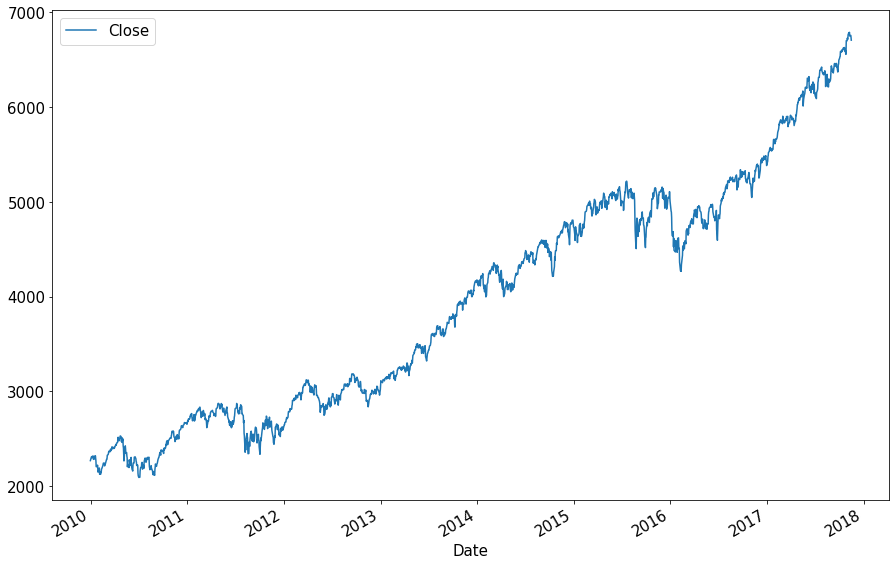

In [380]:
ax = nasdaq_df.plot(y=["Close"])

We can also plot the returns for all the markets.

To do this we temporarly add back the IXIC feature that represents NASDAQ return. We compute this using the [equation already described](#return_equation_cell) and putting the first value (that would have been NaN) equal to the second using [bfill()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.bfill.html)

In [381]:
nasdaq_df["IXIC"] = (nasdaq_df["Close"] / nasdaq_df["Close"].shift(1) - 1).bfill()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7215f3dd8>,
      dtype=object)

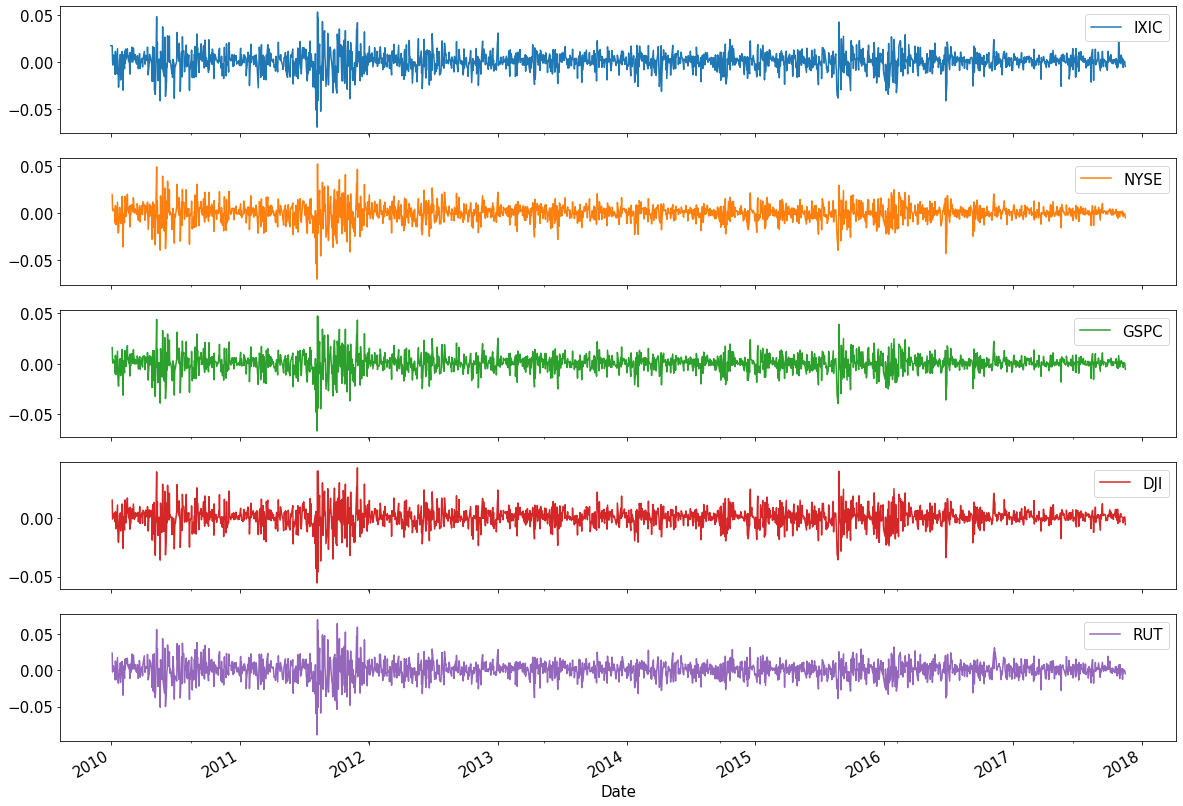

In [382]:
nasdaq_df.plot(y=["IXIC","NYSE","GSPC","DJI","RUT"], subplots=True, figsize=(20,15))

We can see that there are some common trends.

One example is the big oscillation we can observe between 2011 and 2012

Another interesting aspect to look into is the comparison of Nasdaq return among the different years.

As for different years we may have a different number of data points, here we compare only the years that have the same amount of data points and for which the amount corresponds to the maximum.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa721330c18>,
      dtype=object)

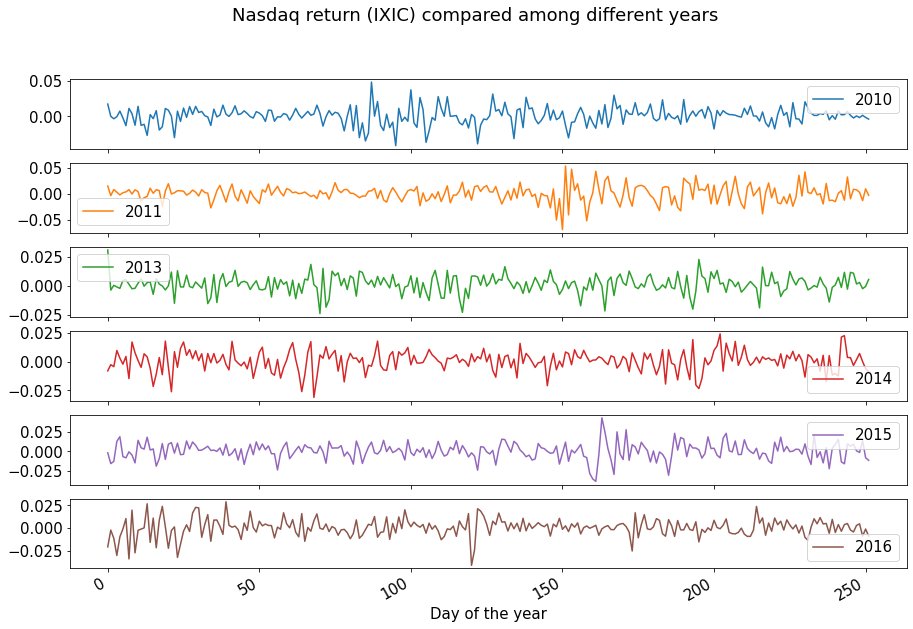

In [383]:
groups = nasdaq_df["IXIC"].groupby(pd.Grouper(freq='A'))

max_size = 0
for _, group in groups:
    if group.values.shape[0] > max_size:
        max_size = group.values.shape[0]

years = pd.DataFrame()
for name, group in groups:
    if group.values.shape[0] == max_size:
        years[name.year] = group.values

years.plot(subplots=True, xlabel="Day of the year", title="Nasdaq return (IXIC) compared among different years")

Apart from some common trends between 2013 and 2014, there are no major similarities between different years.

This gives us an intuition that return depends more on other features ather than time of the year.

Here we report also a whisker plot for the return of NASDAQ over the years.

This plot draws a box around the 25th and 75th percentiles of the data that captures the middle 50% of observations. A line is drawn at the 50th percentile (the median) and whiskers are drawn above and below the box to summarize the general extents of the observations. Dots are drawn for outliers outside the whiskers or extents of the data.

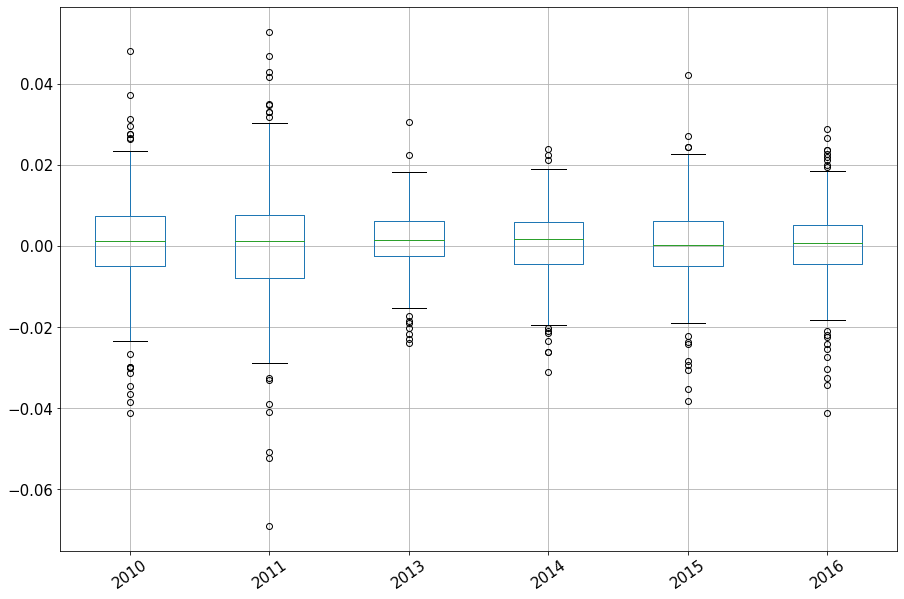

In [384]:
years.boxplot(rot=35)

Another interesting plot to visualize is the distribution of the featrues, we can look at this by plotting an histogram for each feature.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa72104e278>,
      dtype=object)

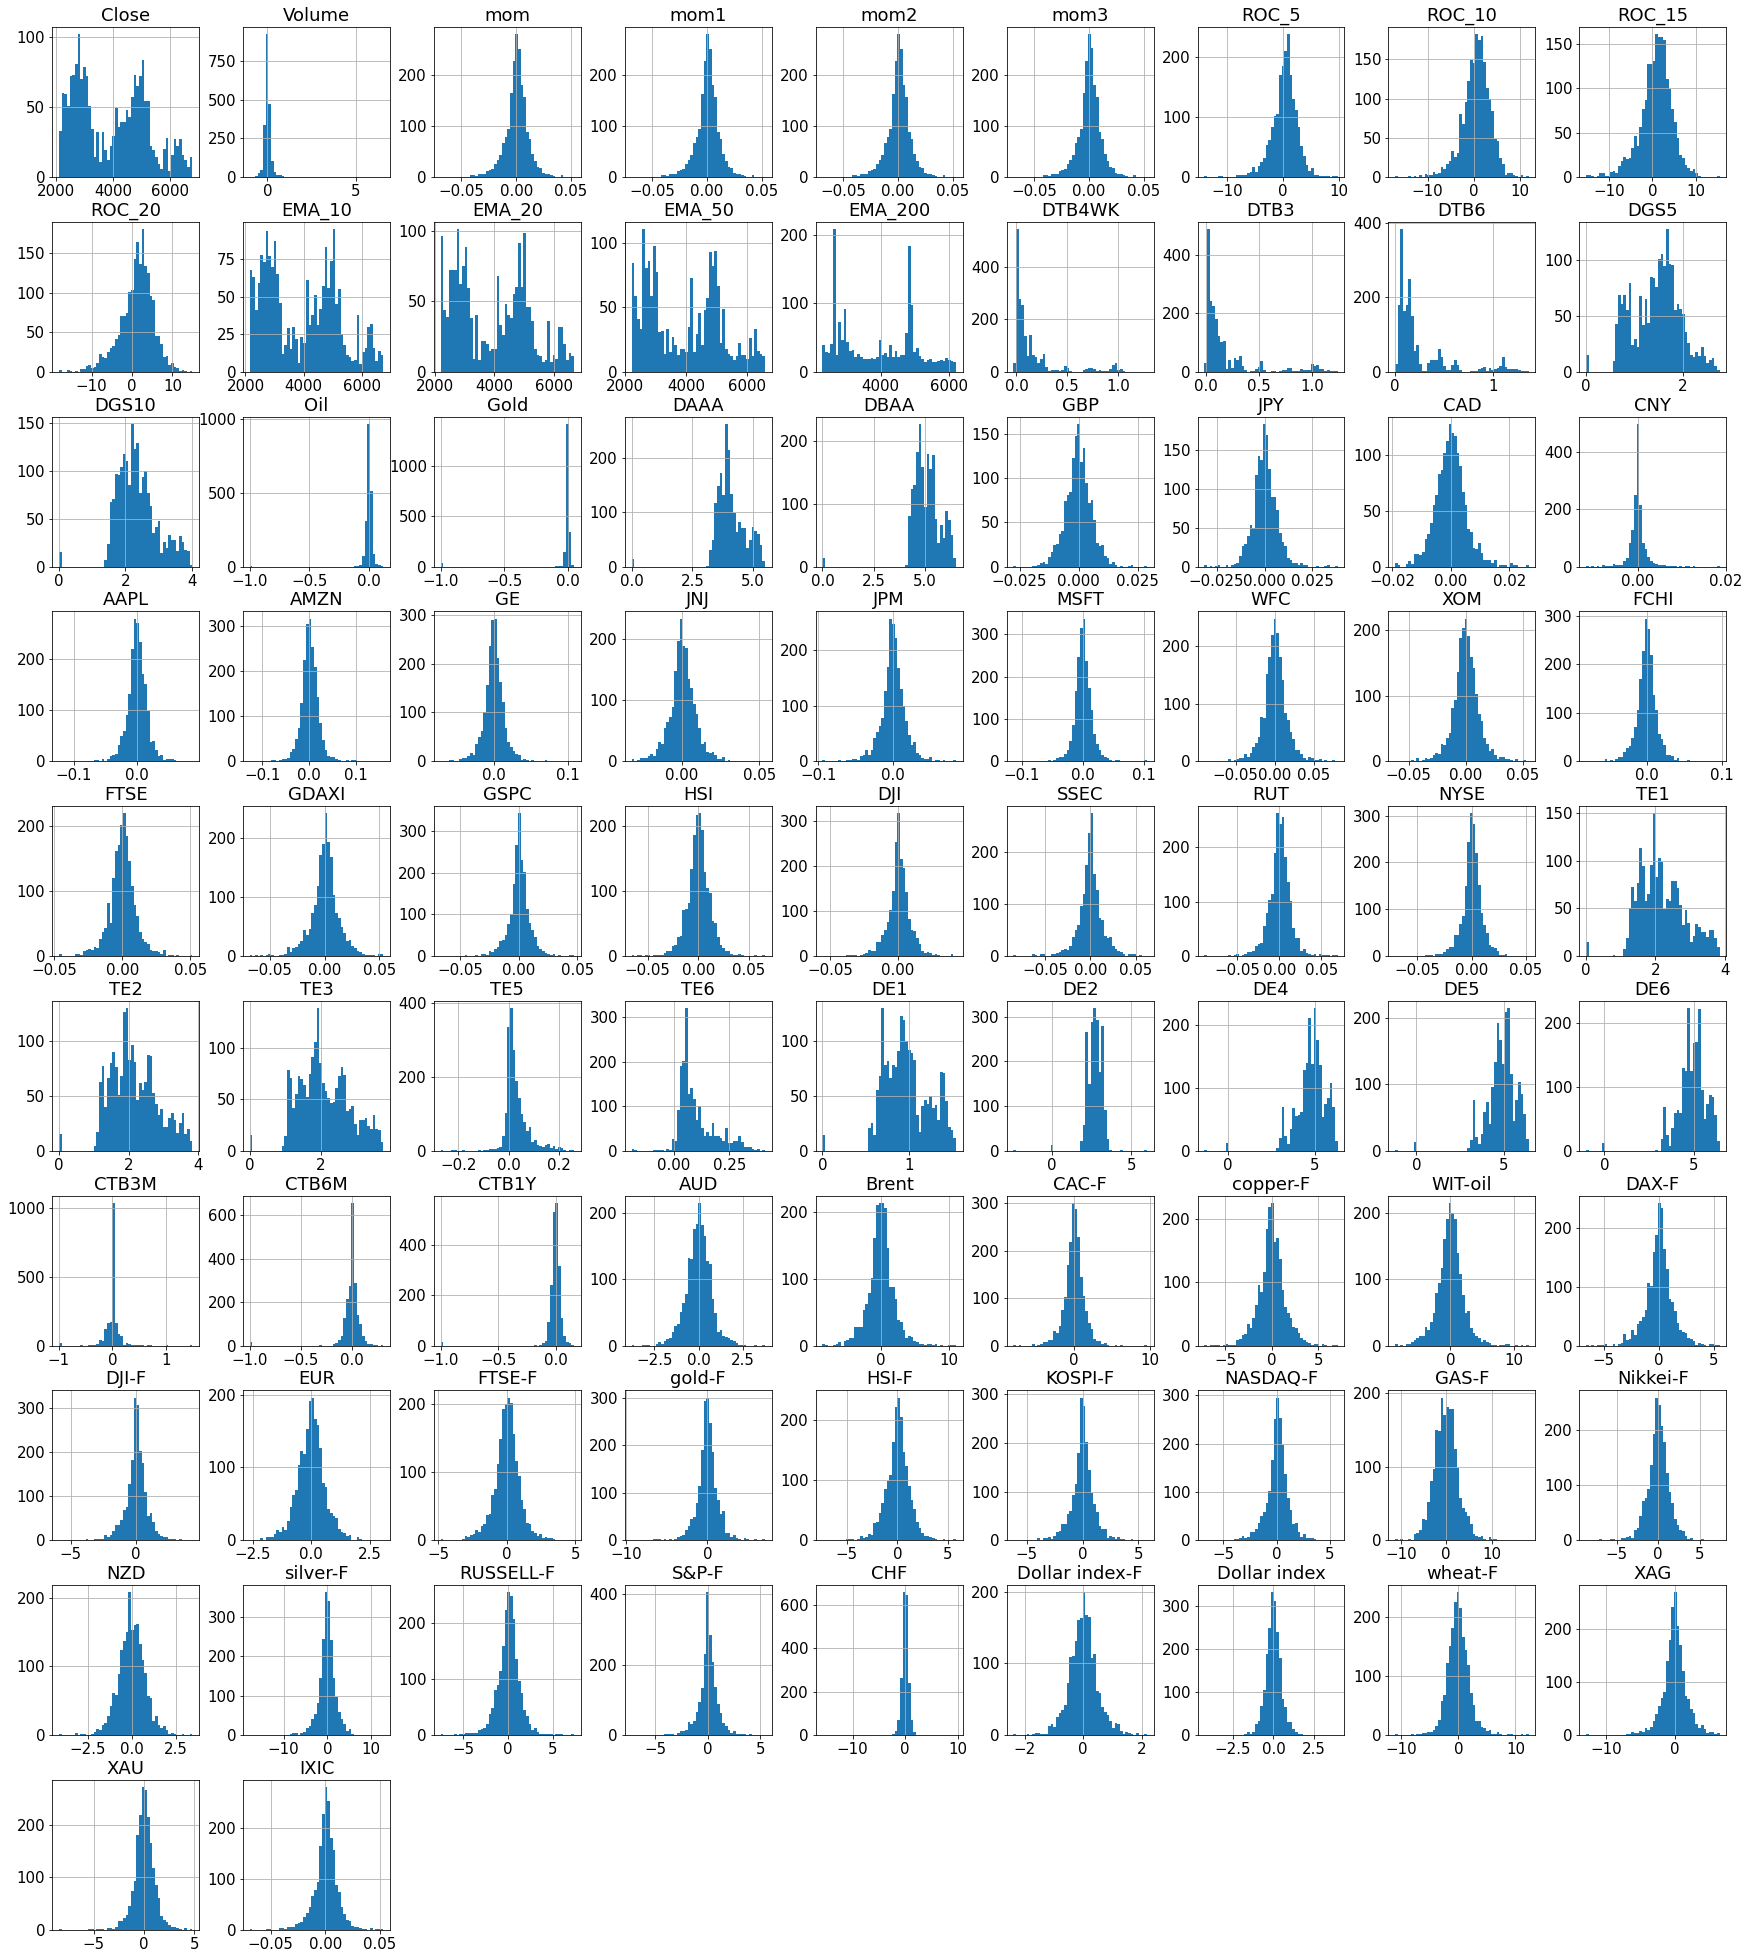

In [385]:
nasdaq_df.hist(figsize=(30,35), bins=50)

We see that a great part of the features is distributed as a gaussian centered in 0.

As we said our dataset contains a time series.

Therefore we can analyse the time series of various features.

Let's build the series for:

*   Close, the close price of the Nasdaq market
*   IXIC, Nasdaq return

In [386]:
close_series = pd.Series(nasdaq_df["Close"])

return_series = pd.Series(nasdaq_df["IXIC"])

Now that we have mapped the two series to the pandas Series object we can look at their autocorrelation plots.

The utocorrelation plot is a way of measuring and explaining the internal association between observations in a time series. We can check how strong an internal correlation is in an given amount of time.

The autocorrelation plot shows how much the value of the time series is correlated with itself $n$ timesteps in the past. $n$ is called lag.

The dotted lines are just above and below the first quartile, or within the 95% confidence interval. This will indicate the significance of the correlation. If the line is above or below the dotted line, not in between, we can say that the correlation is significant, and that the close value is correlated to time.

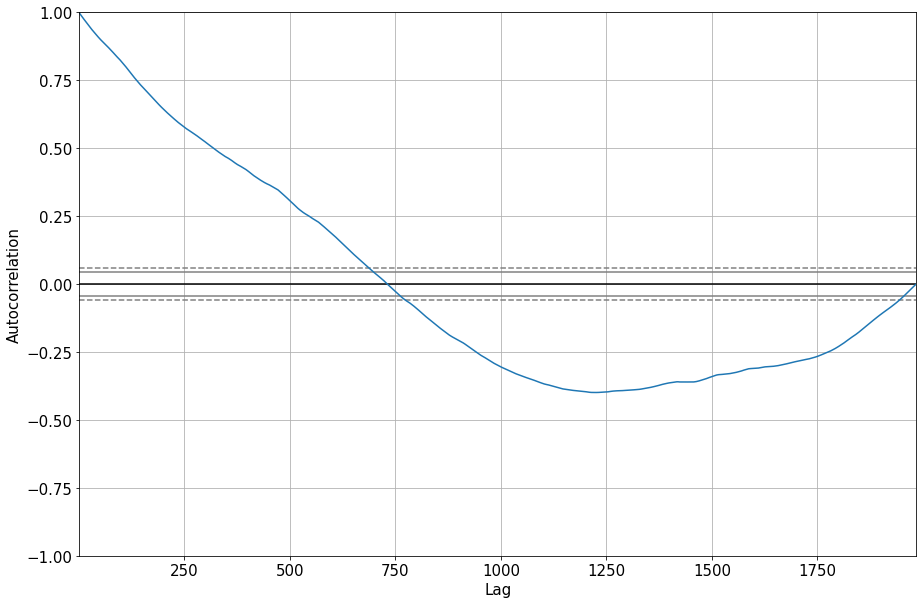

In [387]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(close_series)

In this plot we can see that the close price is higlly correlated with itself in the first part of the graph. The correlation decreases with the increase of the lag as we can expect.
This is intuitive as the close price is a variable that we expect to be correlated with itself for small lags.

There is an interesting negative correlation in the second half of the plot. This could suggest a trend of stock markets to rebalance themselves every three-four years. This could also be an effects of the econimic crisis cycles.

This suggestes that there is an association between time and close price.

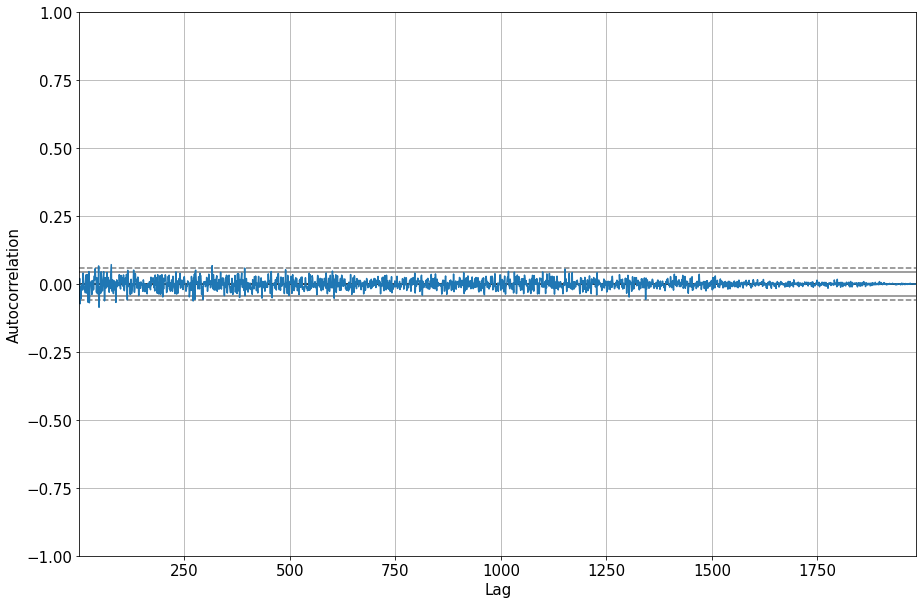

In [388]:
autocorrelation_plot(return_series)

This plot shows that the return of NASDAQ is not correlated with itself in the past and therefore we will rely on other features to predict our target.

## Correlations

In [389]:
def series_to_supervised(data, n_in, dropnan=False):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t)
    cols.append(df.iloc[:][0] - df.shift(1).iloc[:][0])

    names += ['target']
  
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [390]:
#dataset_url = 'https://raw.githubusercontent.com/MatteoBettini/Stock-Market-Prediction-2020/main/stock_markets_datasets/Processed_NASDAQ.csv?token=ANHXQQK4VPBE6ABSBCHTF5K74UP3W'
#nasdaq_df = pd.read_csv(dataset_url)
# Dataset is now stored in a Pandas Dataframe
#nasdaq_df.info()
#nasdaq_df = nasdaq_df.drop(columns=['Date','Name'])


In [391]:
#data = series_to_supervised(nasdaq_df.values, 40)

#data.info()